# Bienes Raizes Análisis de Regresión
Katlyn Goeujon-Mackness <br>
13/03/2025

## Objectivo
Vamos a efectuar un análisis de regresión lineal múltiple mediante matrices que permitan construir un modelo predictivo a una base de datos real, de manera que podamos generar pronósticos adecuados.

## Los Datos
Proporcionados por Kaggle, estos datos representan casas vendidas en una ciudad de Estados Unidos. Incluyen variables que explican diversos aspectos de las propiedades, tales como tamaño, número de habitaciones, ubicación y características adicionales. El propósito de este conjunto de datos es facilitar el análisis y la predicción de los precios de las casas.

In [77]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('Data/kc_house_data.csv')


## Exploración

In [78]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [80]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [81]:
# Seleccionar variables adecuadas 
data["Intercepto"] = 1
data = data[["Intercepto", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "price"]]
print(data.shape)
data.head()

(21613, 16)


,Intercepto,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,1,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,221900.0
1,1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,538000.0
2,1,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,180000.0
3,1,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,604000.0
4,1,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,510000.0


## Limpieza

In [82]:
# Manejar los datos faltantes
data = data.dropna()

# Codificar las variables categóricas
data = pd.get_dummies(data, columns=["zipcode"], drop_first=True)
data.head()

,Intercepto,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1,3,1.00,1180,5650,1.0,0,0,3,7,...,False,False,False,False,False,False,True,False,False,False
1,1,3,2.25,2570,7242,2.0,0,0,3,7,...,False,False,False,False,False,False,False,False,False,False
2,1,2,1.00,770,10000,1.0,0,0,3,6,...,False,False,False,False,False,False,False,False,False,False
3,1,4,3.00,1960,5000,1.0,0,0,5,7,...,False,False,False,False,False,False,False,False,False,False
4,1,3,2.00,1680,8080,1.0,0,0,3,8,...,False,False,False,False,False,False,False,False,False,False


## Modelación
Construye un modelo de regresión lineal múltiple mediante matrices para pronosticar el precio de una casa.

In [83]:
# Definir el variable dependiente
X = data.drop("price", axis=1)
y = data["price"]

In [84]:

# Normalizar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)
X_train.shape

(15129, 83)

In [86]:
# Opción de formato numérico
np.set_printoptions(formatter={'float_kind':'{:f}'.format})


In [87]:

# Crear el modelo
X = X_train
Y = Y_train


In [88]:

# Cálculo de XT_X
XT_X = np.matmul(np.matrix.transpose(X), X)
XT_X.shape


(83, 83)

In [89]:

# Cálculo de XT_X_pinv
XT_X_pinv = np.linalg.pinv(XT_X)
XT_X_pinv.shape


(83, 83)

In [90]:
# Cálculo de XT_Y y coeficientes de regresión
XT_Y = np.matmul(np.matrix.transpose(X), Y)
betas = np.matmul(XT_X_pinv, XT_Y)


In [91]:
betas

array([0.000000, -22651.950181, 16112.142564, 82642.754832, 8214.870012,
       -12727.372946, 57140.305753, 38841.074570, 16204.318916,
       80516.367230, 80907.405452, 20118.155214, -26621.525797,
       5466.656514, 5736.394303, -2108.699424, 93276.429135, 25836.435661,
       35566.311268, 15984.108588, 32201.426357, 4232.383882,
       13241.180448, 6582.070534, 7725.220534, 450.845089, -8681.085371,
       4431.681482, 24692.325101, 14184.581856, 24697.304392, 816.978989,
       1760.701806, 2297.523690, 50014.284628, 29055.303345, 7890.463046,
       60619.730778, 50007.068675, -2337.685244, 8082.033975,
       36184.073672, 28904.966761, -1345.721411, 14904.403871,
       5931.239587, 15530.463462, 12448.804107, -489.283460, 15370.507632,
       23613.992604, 23479.515501, 12658.321356, 658.359958, 31293.254719,
       50569.500686, 46933.084487, 17031.197318, 39747.642294,
       8722.724814, 36616.394287, 66054.577654, 49541.853096,
       29849.517546, 46246.601365, 26577.

## Evaluación

In [92]:
# Cálculo de MSE y R2
mse = np.mean((Y_test - Y_pred) ** 2)
print("Mean Squared Error:", mse)
print("Coeficiente R cuadrado:", r2_score(Y_test, Y_pred))

Mean Squared Error: 330751216319.3652
Coeficiente R cuadrado: -1.119244809691581


In [93]:
# Cálculo de TSS, ESS y RSS
TSS = np.matmul(Y.T, Y) - len(Y) * (Y.mean()**2)
ESS = np.matmul(np.matmul(betas.T, X.T), np.matmul(X, betas)) - len(Y) * (Y.mean()**2)
RSS = TSS - ESS

print("TSS:", TSS)
print("TSS:", ESS)
print("TSS:", RSS)

TSS: 1900668073054776.0
TSS: -2832575553671050.5
TSS: 4733243626725826.0


In [94]:
# Cálculo del Coeficiente de Determinación R Cuadrada
RSq = 1 - RSS / TSS
print("R Cuadrado:", RSq)

R Cuadrado: -1.4903052215311332


In [95]:
# Reporte Automatizado de la regresión en Python
import statsmodels.api as sm

regressor = sm.OLS(Y, X).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.246
Model:                            OLS   Adj. R-squared (uncentered):              0.242
Method:                 Least Squares   F-statistic:                              60.50
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        13:45:46   Log-Likelihood:                     -2.2169e+05
No. Observations:               15129   AIC:                                  4.435e+05
Df Residuals:                   15048   BIC:                                  4.442e+05
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Predicción

In [96]:
# Hacer las predicciones en la base de prueba y calcular los residuos
Y_pred = np.matmul(X_test, betas)
Resid = Y_test - Y_pred


array([[<Axes: title={'center': 'price'}>]], dtype=object)

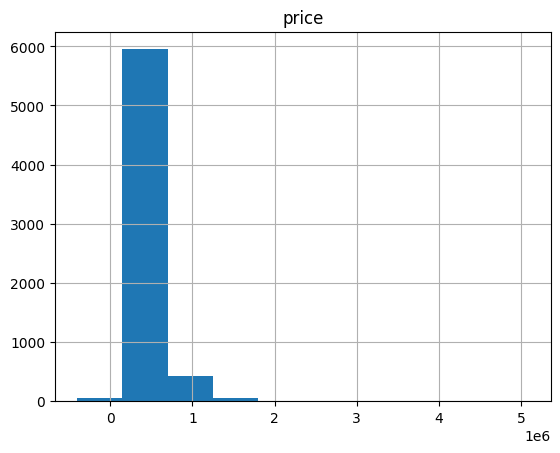

In [97]:
# Gráfico de residuales para la base de prueba
df = pd.DataFrame(Resid)
df.hist()


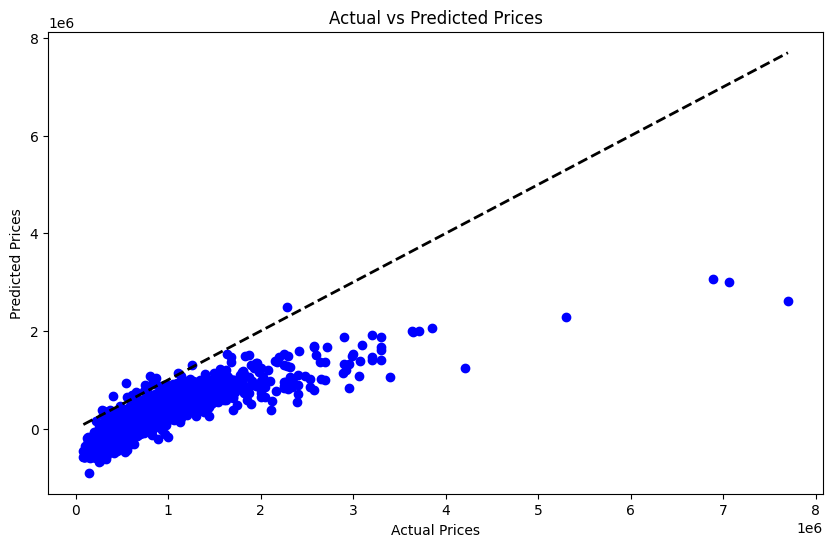

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

